# Binding energies and rediscovery of zeolites

This notebook reproduces Fig. S10 from the paper, highlighting classical synthesis routes for the MFI, IFR, and ISV zeolites.

In [21]:
import itertools
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from scipy import stats

df = pd.read_csv('../data/binding.csv', index_col=0)

## Defining a few useful functions

Below, we start defining a few useful functions and parameters to help us plot more eficiently.

In [2]:
def get_literature_markers(in_literature):
    if in_literature == 1.0:
        return '^'
    return 'o'

def mscatter(x, y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers

    ax = ax or plt.gca()
    sc = ax.scatter(x, y, **kw)

    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

grid_kws = {"width_ratios": (0.45, 0.45, .02), "hspace": .3}

In [3]:
cmap = 'inferno_r'
scatter_kws = {
    'linewidths': 0.7,
    'edgecolors': 'k',
    's': 60,
}

alphamap = mpl.colors.ListedColormap(
    np.array([
        [0, 0, 0, 0],
    ])
)

In [4]:
def plot_osda_annot(ax, d, norm, osdas, color_option, cmap=cmap):
    for i, sp in osdas.items():
        sp_data = d.loc[d['SMILES'] == sp].iloc[0]
        ax.scatter(
            [sp_data[x]],
            [sp_data[y]],
            c=[sp_data[color_option]],
            s=SIZE,
            norm=norm,
            linewidths=LINEWIDTH,
            edgecolors='k',
            cmap=cmap,
            marker='s',
        )
        ax.annotate(
            str(i),
            (sp_data[x], sp_data[y]),
            zorder=3,
            ha='center',
            va='center',
            fontsize=12,
        )

## Figure S10A: MFI

In [6]:
osdas = {
    'a': 'CCC[N+](CCC)(CCC)CCC',
}

SIZE = 350
LINEWIDTH = 2.5

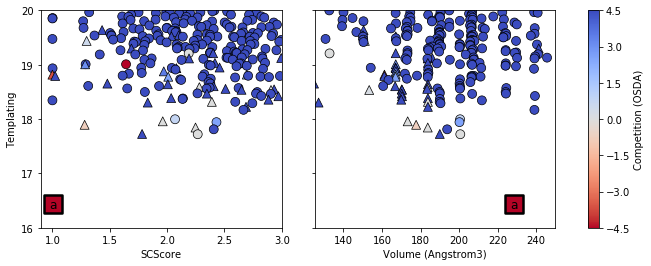

In [7]:
color_option = 'Competition (OSDA)'
zeolite = 'MFI'

grid_kws = {"width_ratios": (0.45, 0.45, .02), "hspace": .3}
fig, ax_fig = plt.subplots(1, 3, figsize=(10, 4), gridspec_kw=grid_kws)

y = 'Templating'
YLIM = [16, 20.00001]
SCS_LIMS = [0.9, 3.0]
VOL_LIMS = [100, 300]

S = 80
SIZE = 350
LINEWIDTH = 2.5

d = df.loc[
    (df['Zeolite'] == zeolite)
    & (~df['SMILES'].str.contains('O'))
    & (df['SMILES'].str.contains('+', regex=False))
    & (df[y] > YLIM[0])
    & (df[y] < YLIM[1])
    & (df['SCScore'] > SCS_LIMS[0])
    & (df['SCScore'] < SCS_LIMS[1])
    & (df['Volume (Angstrom3)'] > VOL_LIMS[0])
    & (df['Volume (Angstrom3)'] < VOL_LIMS[1])
].sort_values('Templating', ascending=False)

color_values = (d[color_option]).values.clip(min=-4.5, max=4.5)

norm = mpl.colors.Normalize(vmin=-4.5, vmax=4.5)
cmap = 'coolwarm_r'
# color = cm.coolwarm_r(norm(color_values))

markers = d['In literature?'].apply(get_literature_markers).values.tolist()


ax = ax_fig[0]
x = 'SCScore'

scat2 = mscatter(
    d[x],
    d[y],
    ax=ax,
    c=color_values,
    m=markers,
    norm=norm,
    s=S,
    linewidths=0.7,
    edgecolors='k',
    cmap=cmap,
)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_xlim(SCS_LIMS)
ax.set_ylim(YLIM)
ax.set_yticks(np.arange(*YLIM))

for i, sp in osdas.items():
    spiro_data = d.loc[d['SMILES'] == sp].iloc[0]
    ax.scatter(
        [spiro_data[x]],
        [spiro_data[y]],
        c=[spiro_data[color_option]],
        s=SIZE,
        norm=norm,
        linewidths=LINEWIDTH,
        edgecolors='k',
        cmap=cmap,
        marker='s',
    )
    ax.annotate(
        str(i),
        (spiro_data[x], spiro_data[y]),
        zorder=3,
        ha='center',
        va='center',
        fontsize=12,
    )
    
ax = ax_fig[1]
x = 'Volume (Angstrom3)'

scat1 = mscatter(
    d[x],
    d[y],
    ax=ax,
    c=color_values,
    m=markers,
    s=S,
    norm=norm,
    linewidths=0.7,
    edgecolors='k',
    cmap=cmap,
)

ax.set_xlabel(x)
ax.set_xlim([125, 250])
ax.set_ylim(YLIM)
ax.set_yticks(np.arange(*YLIM))
ax.set_yticklabels([])

for i, sp in osdas.items():
    spiro_data = d.loc[d['SMILES'] == sp].iloc[0]
    ax.scatter(
        [spiro_data[x]],
        [spiro_data[y]],
        c=[spiro_data[color_option]],
        s=SIZE,
        norm=norm,
        linewidths=LINEWIDTH,
        edgecolors='k',
        cmap=cmap,
        marker='s',
    )
    ax.annotate(
        str(i),
        (spiro_data[x], spiro_data[y]),
        zorder=3,
        ha='center',
        va='center',
        fontsize=12,
    )

ax = ax_fig[2]
cbar = fig.colorbar(scat1, cax=ax)
cbar.set_label(color_option)
cbar.set_ticks(np.arange(-4.5, 4.6, 1.5))

plt.show()

## Figure S10B: IFR

In [22]:
osdas = {
    'b': 'c1ccc(C[N+]23CCC(CC2)CC3)cc1',
}

SIZE = 350
LINEWIDTH = 2.5

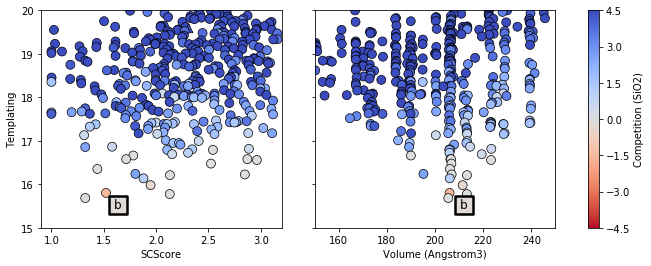

In [24]:
color_option = 'Competition (SiO2)'
zeolite = 'IFR'

grid_kws = {"width_ratios": (0.45, 0.45, .02), "hspace": .3}
fig, ax_fig = plt.subplots(1, 3, figsize=(10, 4), gridspec_kw=grid_kws)

y = 'Templating'
YLIM = [15, 20.00001]
SCS_LIMS = [0.9, 3.2]
VOL_LIMS = [150, 250]

S = 80
SIZE = 350
LINEWIDTH = 2.5

d = df.loc[
    (df['Zeolite'] == zeolite)
    & (~df['SMILES'].str.contains('O'))
    & (df['SMILES'].str.contains('+', regex=False))
    & (df[y] > YLIM[0])
    & (df[y] < YLIM[1])
    & (df['SCScore'] > SCS_LIMS[0])
    & (df['SCScore'] < SCS_LIMS[1])
    & (df['Volume (Angstrom3)'] > VOL_LIMS[0])
    & (df['Volume (Angstrom3)'] < VOL_LIMS[1])
].sort_values('Templating', ascending=False)

color_values = (d[color_option]).values.clip(min=-4.5, max=4.5)

norm = mpl.colors.Normalize(vmin=-4.5, vmax=4.5)
cmap = 'coolwarm_r'
# color = cm.coolwarm_r(norm(color_values))

markers = d['In literature?'].apply(get_literature_markers).values.tolist()


ax = ax_fig[0]
x = 'SCScore'

scat2 = mscatter(
    d[x],
    d[y],
    ax=ax,
    c=color_values,
    m=markers,
    norm=norm,
    s=S,
    linewidths=0.7,
    edgecolors='k',
    cmap=cmap,
)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_xlim(SCS_LIMS)
ax.set_ylim(YLIM)
ax.set_yticks(np.arange(*YLIM))

for i, sp in osdas.items():
    spiro_data = d.loc[d['SMILES'] == sp].iloc[0]
    ax.scatter(
        [spiro_data[x]],
        [spiro_data[y]],
        c=[spiro_data[color_option]],
        s=SIZE,
        norm=norm,
        linewidths=LINEWIDTH,
        edgecolors='k',
        cmap=cmap,
        marker='s',
    )
    ax.annotate(
        str(i),
        (spiro_data[x], spiro_data[y]),
        zorder=3,
        ha='center',
        va='center',
        fontsize=12,
    )
    
ax = ax_fig[1]
x = 'Volume (Angstrom3)'

scat1 = mscatter(
    d[x],
    d[y],
    ax=ax,
    c=color_values,
    m=markers,
    s=S,
    norm=norm,
    linewidths=0.7,
    edgecolors='k',
    cmap=cmap,
)

ax.set_xlabel(x)
ax.set_xlim(VOL_LIMS)
ax.set_ylim(YLIM)
ax.set_yticks(np.arange(*YLIM))
ax.set_yticklabels([])

for i, sp in osdas.items():
    spiro_data = d.loc[d['SMILES'] == sp].iloc[0]
    ax.scatter(
        [spiro_data[x]],
        [spiro_data[y]],
        c=[spiro_data[color_option]],
        s=SIZE,
        norm=norm,
        linewidths=LINEWIDTH,
        edgecolors='k',
        cmap=cmap,
        marker='s',
    )
    ax.annotate(
        str(i),
        (spiro_data[x], spiro_data[y]),
        zorder=3,
        ha='center',
        va='center',
        fontsize=12,
    )

ax = ax_fig[2]
cbar = fig.colorbar(scat1, cax=ax)
cbar.set_label(color_option)
cbar.set_ticks(np.arange(-4.5, 4.6, 1.5))

plt.show()

## Figure S10C: ISV

In [25]:
osdas = {
    'c': 'CC1(C)C[C@@H]2C[C@](C)(C1)C[N+]21CCCCC1',
    'd': 'CC(C)[C@]12C=C[C@](C)(CC1)[C@@H]1C[N+](C)(C)C[C@H]12',
}

SIZE = 350
LINEWIDTH = 2.5

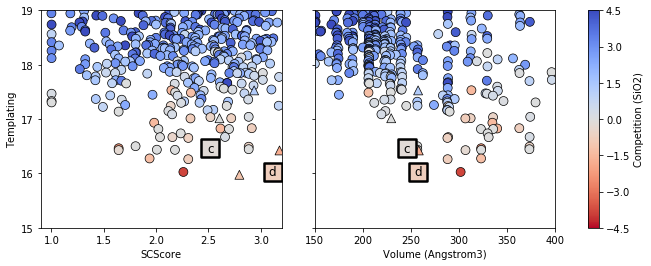

,Zeolite,SMILES,InchiKey,Ligand formula,Loading,Binding (SiO2),Binding (OSDA),Directivity (SiO2),Competition (SiO2),Competition (OSDA),Templating,SCScore,Volume (Angstrom3),Axis 1 (Angstrom),Axis 2 (Angstrom),In literature?,Germanosilicate composition?,Zeolite composition?,Zeotype composition?
crystal_id,,,,,,,,,,,,,,,,,,,
139281704,ISV,C[C@H]1CCC[C@@H](C)[N+]12CCCC2,PUTPMTKFVUXVQX-PHIMTYICNA-N,C11H22N+,4,-10.618004,-169.888069,7.349311,5.719233,30.103557,18.993022,2.432917,189.624,7.208943,6.862740,0.0,False,False,False
139250676,ISV,CCCC[N+]1(C)CCCCCC1,IAJAXMLFMGGDTG-UHFFFAOYNA-N,C11H24N+,4,-10.449998,-167.199961,7.517317,2.299633,36.527218,18.992247,1.312100,200.336,9.452386,4.804215,0.0,False,False,False
139310321,ISV,CC[N+]1([C@@H]2CC(C)(C)C[C@@H]2C)CCCC1,GQPSKPQIABMKFV-QWHCGFSZNA-N,C14H28N+,4,-10.616651,-169.866423,7.350663,2.115866,45.327043,18.991555,2.749658,240.744,8.064693,5.985630,0.0,False,False,False
139301292,ISV,C[N+]1(C)CCC[C@H]2CCC[C@@H]21,DXVZBAYWVZNZGE-ZJUUUORDNA-N,C10H20N+,4,-9.996618,-159.945894,7.970697,3.783486,25.428826,18.988497,2.126160,172.832,6.118778,5.572433,0.0,False,False,False
139339692,ISV,CC(C)N1C[C@@H]2C[C@H](C1)C[N+](C)(C)C2,VWUYRPUOIDYMCI-TXEJJXNPNA-N,C12H25N2+,4,-11.064648,-177.034372,6.902667,3.703718,37.093766,18.985478,3.104736,218.344,8.255295,5.677521,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139268429,ISV,C[C@@H](CC[C@H](C)[N+]1(C)CCCCC1)[N+]1(C)CCCCC1,OXWRLFRGQDGLCQ-ROUUACIJNA-N,C18H38N2+2,3,-11.969262,-255.344253,5.998053,-1.275529,35.165363,16.275758,1.937479,322.824,11.972684,6.047399,0.0,False,False,False
139232119,ISV,C[N+]1(C)C[C@H]2[C@H]3C=C[C@@H]([C@@H]2C1)[C@@...,HKIFRTAWHLMSTR-ZZPLSGKGNA-N,C18H30N2+2,4,-13.833332,-221.333316,4.133983,-0.752874,22.635140,16.262308,2.306805,288.088,9.543576,7.188239,0.0,False,False,False
139685671,ISV,C(CC[N+]12CCC(CC1)CC2)C[N+]12CCC(CC1)CC2,MCTACNBQTATYOV-UHFFFAOYNA-N,C18H34N2+2,3,-12.448290,-265.563512,5.519025,-3.813325,22.347076,16.027145,2.260322,301.600,13.585957,4.780004,0.0,False,False,False


In [27]:
color_option = 'Competition (SiO2)'
zeolite = 'ISV'

grid_kws = {"width_ratios": (0.45, 0.45, .02), "hspace": .3}
fig, ax_fig = plt.subplots(1, 3, figsize=(10, 4), gridspec_kw=grid_kws)

y = 'Templating'
YLIM = [15, 19.00001]
SCS_LIMS = [0.9, 3.2]
VOL_LIMS = [150, 400]

S = 80
SIZE = 350
LINEWIDTH = 2.5

d = df.loc[
    (df['Zeolite'] == zeolite)
    & (~df['SMILES'].str.contains('O'))
    & (df['SMILES'].str.contains('+', regex=False))
    & (df[y] > YLIM[0])
    & (df[y] < YLIM[1])
    & (df['SCScore'] > SCS_LIMS[0])
    & (df['SCScore'] < SCS_LIMS[1])
    & (df['Volume (Angstrom3)'] > VOL_LIMS[0])
    & (df['Volume (Angstrom3)'] < VOL_LIMS[1])
].sort_values('Templating', ascending=False)

color_values = (d[color_option]).values.clip(min=-4.5, max=4.5)

norm = mpl.colors.Normalize(vmin=-4.5, vmax=4.5)
cmap = 'coolwarm_r'
# color = cm.coolwarm_r(norm(color_values))

markers = d['In literature?'].apply(get_literature_markers).values.tolist()


ax = ax_fig[0]
x = 'SCScore'

scat2 = mscatter(
    d[x],
    d[y],
    ax=ax,
    c=color_values,
    m=markers,
    norm=norm,
    s=S,
    linewidths=0.7,
    edgecolors='k',
    cmap=cmap,
)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_xlim(SCS_LIMS)
ax.set_ylim(YLIM)
ax.set_yticks(np.arange(*YLIM))

for i, sp in osdas.items():
    spiro_data = d.loc[d['SMILES'] == sp].iloc[0]
    ax.scatter(
        [spiro_data[x]],
        [spiro_data[y]],
        c=[spiro_data[color_option]],
        s=SIZE,
        norm=norm,
        linewidths=LINEWIDTH,
        edgecolors='k',
        cmap=cmap,
        marker='s',
    )
    ax.annotate(
        str(i),
        (spiro_data[x], spiro_data[y]),
        zorder=3,
        ha='center',
        va='center',
        fontsize=12,
    )
    
ax = ax_fig[1]
x = 'Volume (Angstrom3)'

scat1 = mscatter(
    d[x],
    d[y],
    ax=ax,
    c=color_values,
    m=markers,
    s=S,
    norm=norm,
    linewidths=0.7,
    edgecolors='k',
    cmap=cmap,
)

ax.set_xlabel(x)
ax.set_xlim(VOL_LIMS)
ax.set_ylim(YLIM)
ax.set_yticks(np.arange(*YLIM))
ax.set_yticklabels([])

for i, sp in osdas.items():
    spiro_data = d.loc[d['SMILES'] == sp].iloc[0]
    ax.scatter(
        [spiro_data[x]],
        [spiro_data[y]],
        c=[spiro_data[color_option]],
        s=SIZE,
        norm=norm,
        linewidths=LINEWIDTH,
        edgecolors='k',
        cmap=cmap,
        marker='s',
    )
    ax.annotate(
        str(i),
        (spiro_data[x], spiro_data[y]),
        zorder=3,
        ha='center',
        va='center',
        fontsize=12,
    )

ax = ax_fig[2]
cbar = fig.colorbar(scat1, cax=ax)
cbar.set_label(color_option)
cbar.set_ticks(np.arange(-4.5, 4.6, 1.5))

plt.show()